In [45]:
import numpy as np
import importlib
import soa as SOA
import plotting as PLOTTING
importlib.reload(SOA)
importlib.reload(PLOTTING)

<module 'plotting' from 'c:\\Users\\jensp\\OneDrive - Aarhus universitet\\Skrivebord\\Uni\\6. Semester\\bachelor-projekt\\Arbejdspakke1\\N-body-pendul\\plotting.py'>

In [33]:
##Test af rotfromquat
q = np.array([0, 0, 0, 1])
R = SOA.rotfromquat(q)
print(np.shape(R))

#uncomment to trigger assert 
# q_fail = np.array([0, 0, 0, 1]).reshape((4,1))
# R_fail = SOA.rotfromquat(q_fail)

(3, 3)


In [30]:
## test af skewfromvec
v = np.array([1,2,3]) 
S = SOA.skewfromvec(v)
print(np.shape(S))

#uncomment to trigger assert 
# v_fail = v.reshape((3,1))
# S_fail = SOA.skewfromvec(v_fail)

(3, 3)


In [37]:
## Test af RBT
v = np.array([1,2,3])
phi = SOA.RBT(v)
print(np.shape(phi))

(6, 6)


Generating Force Plot...


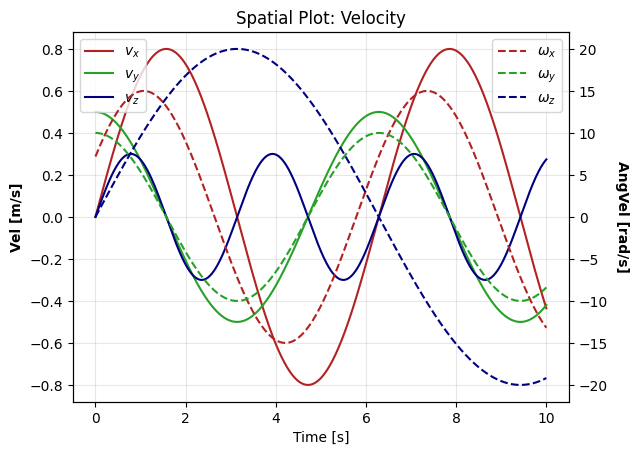

In [46]:
# 1. Create a time vector: 0 to 10 seconds, 1000 points
N = 1000
t_test = np.linspace(0, 10, N)

# 2. Generate dummy data (6 rows, N columns)
# Rows 0, 1, 2: "Linear" data (Small values, e.g., -1 to 1)
linear_data = np.array([
    0.8 * np.sin(t_test),      # x-component
    0.5 * np.cos(t_test),      # y-component
    0.3 * np.sin(2 * t_test)   # z-component
])

# Rows 3, 4, 5: "Angular" data (Large values, e.g., -20 to 20)
angular_data = np.array([
    15 * np.sin(t_test + 0.5), # x-component
    10 * np.cos(t_test),       # y-component
    20 * np.sin(0.5 * t_test)  # z-component
])

# Stack them to get a (6, N) array
spatial_data = np.vstack((linear_data, angular_data))
# 3. Run the test for each mode
print("Generating Force Plot...")
PLOTTING.spatial_plot(t_test, spatial_data, type="velocity")